<a href="https://colab.research.google.com/github/tejucodes10/AI-Main-Practicals/blob/main/CNN_Ganesha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convoluted Neural Networks
## 📚Reference : Geeks for Geeks and ChatGPT

 This code only tries to understand the architecture of CNN and does not include flattening layer and fully connected layer (dense layer) for final classification/regression task output

For theoretical details,

Visit ▶ https://www.geeksforgeeks.org/introduction-convolution-neural-network/

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

In [2]:
plt.rc('figure', autolayout=True)
#Configures Matplotlib to automatically adjust figure layout for better spacing.
plt.rc('image', cmap='magma')
#Sets the default colormap to 'magma' for images, enhancing visual contrast.

In [3]:
kernel = tf.constant([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1],
                   ])
#Defines a convolution kernel as a TensorFlow constant. This kernel is used to detect edges in the image.

In [4]:
import urllib.request

url = 'https://media.geeksforgeeks.org/wp-content/uploads/20231218174514/Ganesh.jpg'
image_path = 'Ganesh.jpg'
urllib.request.urlretrieve(url, image_path)


('Ganesh.jpg', <http.client.HTTPMessage at 0x7d8635b86920>)

In [5]:
# load the image
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1)
#Decodes the JPEG image to a tensor with one color channel (grayscale).
image = tf.image.resize(image, size=[300, 300])
#Resizes the image to 300x300 pixels.

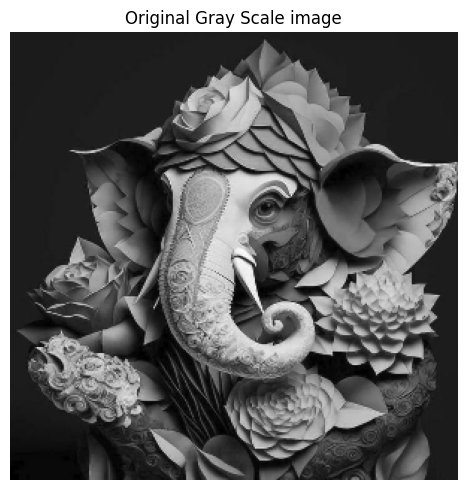

In [6]:
img = tf.squeeze(image).numpy()
#Removes dimensions of size 1 from the tensor and converts it to a NumPy array for plotting
plt.figure(figsize=(5, 5))
#Creates a figure for plotting with specified size.
plt.imshow(img, cmap='gray')
#Displays the image in grayscale.
plt.axis('off')
#Hides the axis ticks and labels.
plt.title('Original Gray Scale image')
plt.show();
#Displays plot

In [7]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
#Converts the image to floating point format with values in [0, 1].
image = tf.expand_dims(image, axis=0)
#Adds a batch dimension to the image tensor.
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
#Reshapes the kernel to match the format expected by TensorFlow's convolution function.
kernel = tf.cast(kernel, dtype=tf.float32)
#Casts the kernel to floating point format

In [8]:
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
)
#Applies the convolution function to the image using the kernel.
#Strides of 1 mean the filter moves one pixel at a time, and 'SAME' padding means the output size is the same as the input size.

In [9]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Convolution')

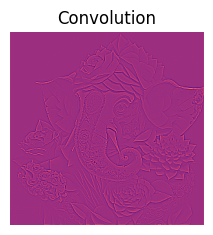

In [10]:
plt.subplot(1, 3, 1)
plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

In [11]:
#Assigns TensorFlow's ReLU (Rectified Linear Unit) activation function to a variable.
relu_fn = tf.nn.relu
#Applies the ReLU function to the convolved image, setting all negative values to zero.
image_detect = relu_fn(image_filter)

Text(0.5, 1.0, 'Activation')

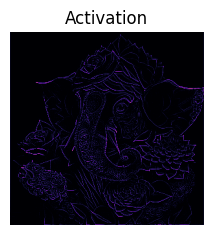

In [12]:
plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)
plt.axis('off')
plt.title('Activation')
#Displays the image after applying the ReLU activation.

In [13]:
# Pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                      window_shape=(2, 2),
                      pooling_type='MAX',
                      strides=(2, 2),
                      padding='SAME',
                     )
#Applies max pooling to the image.
#The window shape is 2x2, and strides of 2 mean the window moves two pixels at a time. 'SAME' padding ensures the output size is reduced but not drastically.

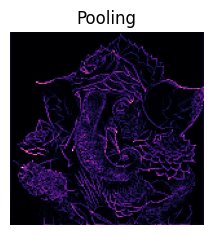

In [14]:
plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()
#Displays pooled image

**Convolution Layer Output :**

The convolution operation with the specified kernel (an edge detection kernel) produces an output where edges are highlighted. The dark pink background with blackish edges indicates:

**Edges**: Areas where there is a significant change in pixel intensity are highlighted by the kernel. These appear darker (blackish) because the convolution operation results in high positive or negative values around these edges.

**Background (Dark Pink):** The pinkish hue indicates areas where the convolution operation resulted in negative values. These negative values are represented with colors typically associated with the colormap being used (magma in this case).

**Activation Layer (ReLU) Output:**

The ReLU (Rectified Linear Unit) activation function is applied to the output of the convolution layer. ReLU works by setting all negative values to zero while keeping positive values unchanged. Therefore:

**Edges:** The edges that were highlighted in the convolution output and had positive values remain the same or become more distinct.

**Background:** The areas that had negative values (represented by the pinkish hue) are set to zero, resulting in a black background.

**Explanation:**
The transformation from a dark pink background to a black background indicates that the pink areas in the convolution output correspond to negative pixel values, which were set to zero by the ReLU activation function.

**Max Pooling Operation**:

Max pooling is a down-sampling technique that reduces the dimensions of the feature map while preserving the most important features. Here's what happens during max pooling:

1. **Windowing**: The input image is divided into non-overlapping windows (usually 2x2).
2. **Max Selection**: For each window, the maximum value is selected and used to form the output feature map.
3. **Dimensionality Reduction**: The output feature map has reduced dimensions compared to the input, but it retains the most significant features from each window.

**Effects on the Image:**

- **Preserved Edges**: Max pooling preserves the strongest activations (edges in this case) because it selects the maximum value in each window. This makes the edges more prominent in the pooled feature map.
- **Resolution Reduction**: The pooling operation reduces the spatial dimensions of the feature map, leading to a lower resolution image. This reduction in resolution can make the image appear distorted or less detailed.
- **Information Compression**: By keeping only the maximum values, max pooling compresses the information, which can lead to a loss of finer details while emphasizing prominent features.

**Visual Illustration:**

Imagine a simple example with a 4x4 grid and a 2x2 max pooling operation:

Original Feature Map:
```
1 3 2 4
5 6 1 2
2 8 3 1
4 7 1 5
```

After 2x2 Max Pooling:
```
6 4
8 5
```

- **Preserved High Values**: The highest values from each 2x2 block are kept, emphasizing the strongest features (edges).
- **Reduced Resolution**: The grid size is reduced from 4x4 to 2x2, losing some spatial details.

**Conclusion:**

The pooling layer's effect of making edges more prominent while introducing some distortion due to resolution reduction is expected behavior. This process helps in creating a more abstract representation of the image that highlights essential features while reducing computational complexity and the potential for overfitting in subsequent layers of a CNN.